In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('./train.csv')
data.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
0,12270,1920,1080,93,3,1,10,183630
1,5860,1943,1320,1431,1,2,10,326652
2,10390,1918,1747,1123,3,1,8,362935
3,18418,1970,623,243,2,2,4,122923
4,10191,2001,843,57,2,3,11,139621


In [3]:
y = data['SalePrice']

x = data.drop(['SalePrice'], axis=1)


In [4]:
from sklearn.ensemble import RandomForestRegressor
x_train,x_valid,y_train,y_valid = train_test_split(x,y,train_size=0.8,random_state=0)


In [5]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(x_train,y_train)
preds = model.predict(x_valid)


In [6]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_valid, preds)

In [7]:
print("Mean Absolute Error:", mae)

Mean Absolute Error: 9214.789354166667


In [8]:
from sklearn.ensemble import RandomForestRegressor
mmodel1 = RandomForestRegressor(n_estimators=50, random_state=0)
mmodel2 = RandomForestRegressor(n_estimators=100, random_state=0)
mmodel3 = RandomForestRegressor(n_estimators=100, random_state=0, criterion='absolute_error')
mmodel4 = RandomForestRegressor(n_estimators=200,min_samples_split=20, random_state=0)
mmodel5 = RandomForestRegressor(n_estimators=50,max_depth=7 ,random_state=0)

models = [mmodel1, mmodel2, mmodel3, mmodel4, mmodel5]
for model in models:
    model.fit(x_train, y_train)
    preds = model.predict(x_valid)
    mae = mean_absolute_error(y_valid, preds)
    print(f"Model {model.__class__.__name__} - Mean Absolute Error: {mae}")

Model RandomForestRegressor - Mean Absolute Error: 9275.905749999998
Model RandomForestRegressor - Mean Absolute Error: 9214.789354166667
Model RandomForestRegressor - Mean Absolute Error: 9263.232775000002
Model RandomForestRegressor - Mean Absolute Error: 9315.727426338046
Model RandomForestRegressor - Mean Absolute Error: 10367.853664637087


In [18]:
print(x.isnull().sum())

LotArea         0
YearBuilt       0
1stFlrSF        0
2ndFlrSF        0
FullBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
dtype: int64


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipe = Pipeline(steps=[
    ('preprocessor',SimpleImputer()),
    ('model',RandomForestRegressor(n_estimators=100,random_state=0))
])

In [11]:
from sklearn.model_selection import cross_val_score
scores = -1*cross_val_score(my_pipe,x,y,scoring='neg_mean_absolute_error',cv=5)
print(f'Mean absolute error: {scores.mean():.2f} ({scores.std():.2f})')

Mean absolute error: 9040.57 (128.01)


In [12]:
def get_score(n_estimators):
    my_pipe = Pipeline(steps = [
        ('preprocessor',SimpleImputer()),
        ('model',RandomForestRegressor(n_estimators=n_estimators,random_state=0))
    ])
    
    score = -1*cross_val_score(my_pipe, x, y, scoring='neg_mean_absolute_error', cv=3)
    return score.mean()

In [13]:
results = {}

for i in range(1,9):
    results[i*50] = get_score(i*50)

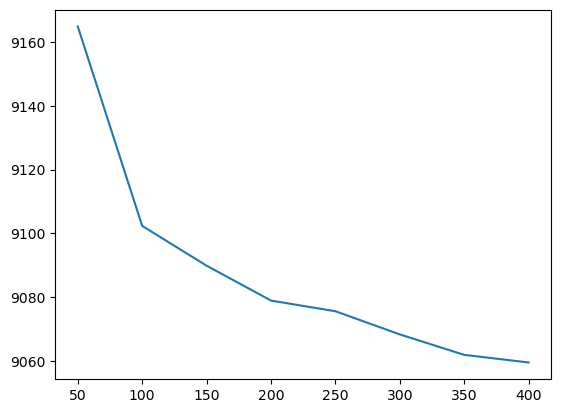

In [14]:
import matplotlib.pyplot as plt
plt.plot(list(results.keys()), list(results.values()))

In [21]:
best = min(results,key=results.get)
best

400

In [23]:
final_pipe = Pipeline(steps=[
    ('preprocessor',SimpleImputer()),
    ('model',RandomForestRegressor(n_estimators=best, random_state=0))
])

final_pipe.fit(x,y)
preds = final_pipe.predict(x)

In [25]:
output = pd.DataFrame({'id':x.index ,'SalePrice': preds})
output.to_csv('submission.csv', index=False)
print("Submission saved to 'submission.csv'.")

Submission saved to 'submission.csv'.
